In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import pickle

In [ ]:
data_set = pd.read_csv('cloth_size_test.csv')
data_set.shape

(119734, 4)

In [ ]:
data_set.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
data_set.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [ ]:
data_set = data_set.dropna()
data_set.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [ ]:
data_set["size"].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

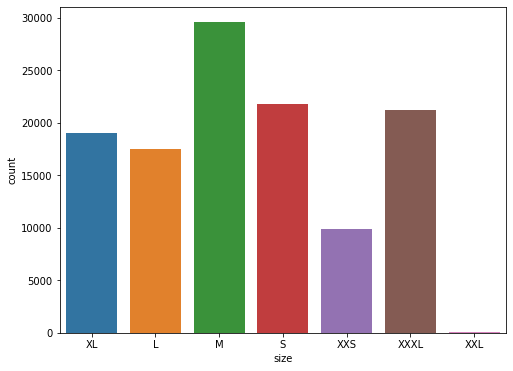

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=data_set["size"])

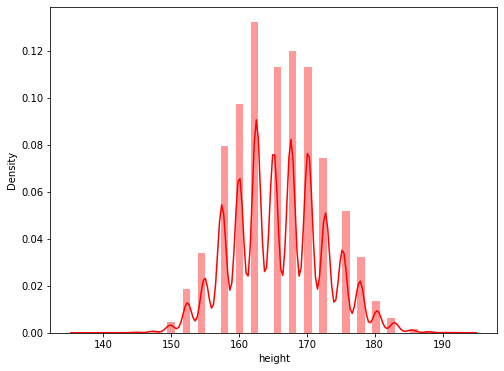

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_set["height"], color="r")

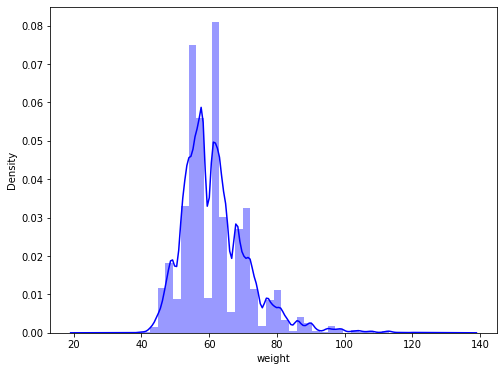

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_set["weight"], color="b")

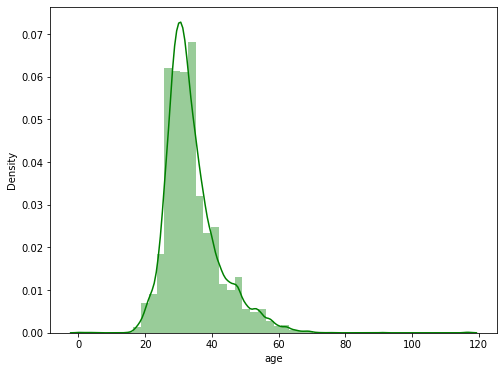

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_set["age"], color="g")

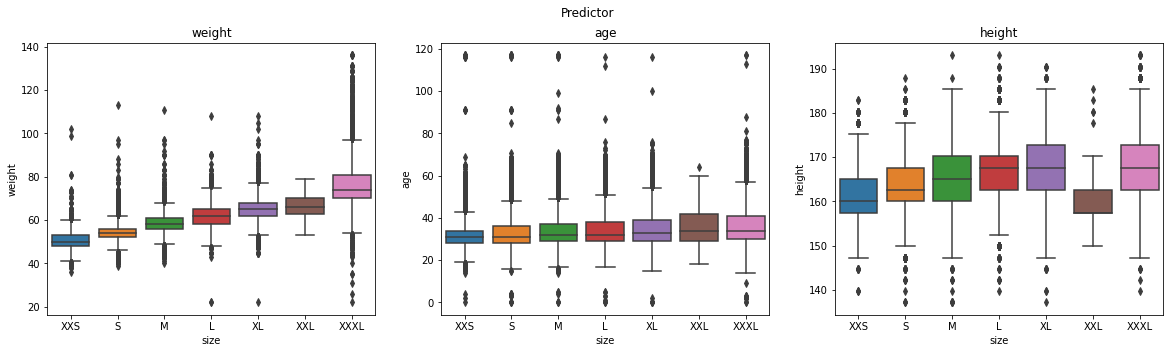

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5)); 
fig.suptitle('Predictor'); 
size_order = ['XXS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# weight 
sns.boxplot(x = 'size', y = 'weight', data = data_set, ax = axes[0], order=size_order); 
axes[0].set_title('weight');
# age 
sns.boxplot(x = 'size', y = 'age', data = data_set, ax = axes[1], order=size_order); 
axes[1].set_title('age');
# height 
sns.boxplot(x = 'size', y = 'height', data = data_set, ax = axes[2], order=size_order); 
axes[2].set_title("height");

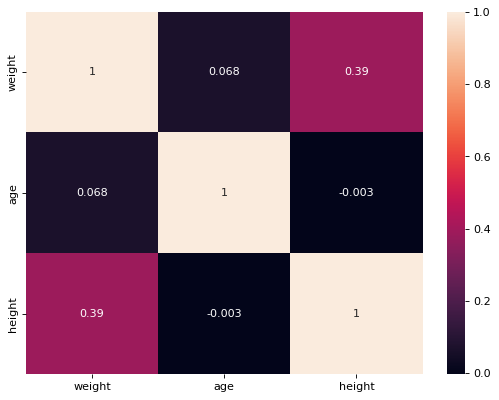

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(data_set.corr(), annot=True)
plt.show()

In [ ]:
#Mapping the size of clothes 
data_set['size'] = data_set['size'].map({ 'XXS': 1, 'S': 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

In [ ]:
data_set.head()

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3


In [ ]:
X = data_set.drop("size", axis=1)
y = data_set["size"]

In [ ]:
print(X.shape)
print(y.shape)

(119153, 3)
(119153,)


In [ ]:
X.head()

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


In [ ]:
y.head()

0    5
1    4
2    3
3    4
4    3
Name: size, dtype: int64

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train), len(X_test)

(95322, 23831)

In [ ]:
len(y_train), len(y_test)

(95322, 23831)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()

Lreg.fit(X_train, y_train)
Lreg.predict(X_test)
LinearRegressionScore = Lreg.score(X_test, y_test)
print("Accuracy : ", LinearRegressionScore)

Accuracy :  0.6505098373563862


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
KNN.fit(X_train,y_train)
KNN.predict(X_test)
KNeighborsClassifierScore = KNN.score(X_test,y_test)
print("Accuracy : ", KNeighborsClassifierScore)

Accuracy :  0.47908186815492426


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.predict(X_test)
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy : ", DecisionTreeClassifierScore)

Accuracy :  0.5070706222986866


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest.predict(X_test)
RandomForestClassifierScore = forest.score(X_test,y_test)
print("Accuracy : ", RandomForestClassifierScore)

Accuracy :  0.5112668373127439


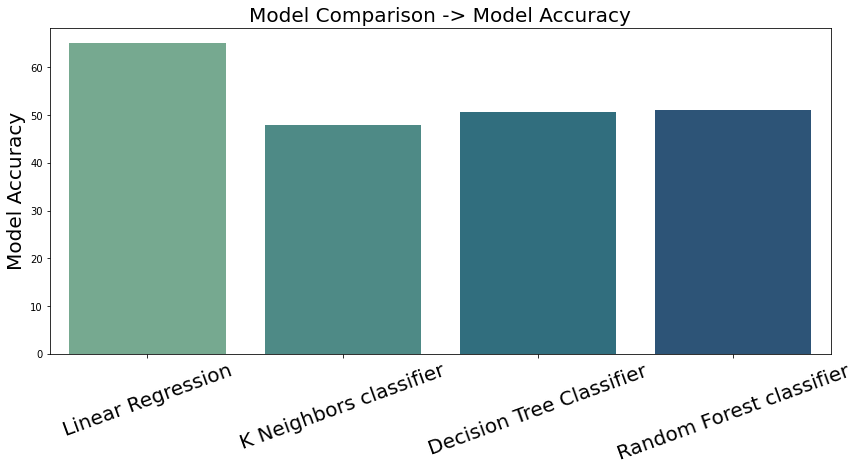

In [ ]:
x = ["Linear Regression", "K Neighbors classifier", "Decision Tree Classifier", "Random Forest classifier"] 
y = [LinearRegressionScore*100, KNeighborsClassifierScore*100, DecisionTreeClassifierScore*100, RandomForestClassifierScore*100]
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x=x,y=y, palette="crest")
plt.ylabel("Model Accuracy", fontsize=20) 
plt.xticks (rotation=20, fontsize=20) 
plt.title("Model Comparison -> Model Accuracy", fontsize=20);

Removing Outliers

In [ ]:
data_set_WO = []
sizes = []
for size_type in data_set['size'].unique():
		sizes.append(size_type)
		ndf = data_set[['age','height','weight']][data_set['size'] == size_type]
		zscore = ((ndf - ndf.mean())/ndf.std())
		data_set_WO.append(zscore)

In [ ]:
for i in range(len(data_set_WO)):
		data_set_WO[i]['age'] = data_set_WO[i]['age'][(data_set_WO[i]['age']>-3) & (data_set_WO[i]['age']<3)]
		data_set_WO[i]['height'] = data_set_WO[i]['height'][(data_set_WO[i]['height']>-3) & (data_set_WO[i]['height']<3)]
		data_set_WO[i]['weight'] = data_set_WO[i]['weight'][(data_set_WO[i]['weight']>-3) & (data_set_WO[i]['weight']<3)]

In [ ]:
for i in range(len(sizes)):
		data_set_WO[i]['size'] = sizes[i]

In [ ]:
new_data_set = pd.concat(data_set_WO)
new_data_set.head()

,age,height,weight,size
0,-0.833765,0.767109,-0.660874,5
24,-0.713753,1.539084,1.556823,5
25,-0.353718,-1.162831,-0.291257,5
28,-0.473729,-1.934807,-1.400106,5
34,0.126330,-0.776843,0.447975,5


In [ ]:
new_data_set['age'][new_data_set['age']<-3]
new_data_set['height'][new_data_set['height']<-3]
new_data_set['weight'][new_data_set['weight']<-3]
new_data_set = new_data_set.dropna()

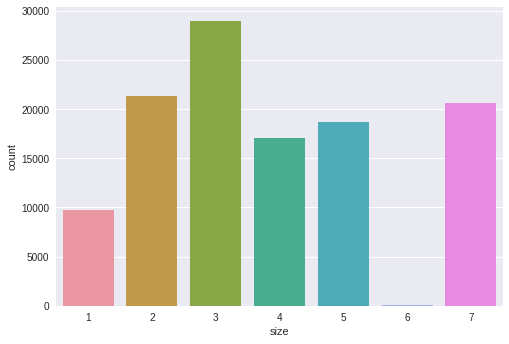

In [ ]:
plt.style.use('seaborn')
sns.countplot(x=new_data_set['size'])
plt.show()

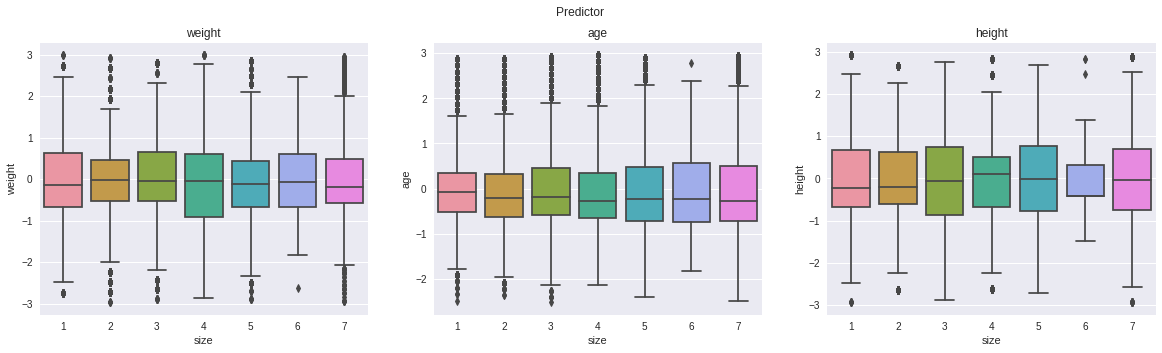

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Predictor')

# weight
sns.boxplot(x = 'size',y = 'weight', data = new_data_set, ax = axes[0])
axes[0].set_title('weight')

# age
sns.boxplot(x = 'size',y = 'age', data = new_data_set, ax = axes[1])
axes[1].set_title('age')

# height
sns.boxplot(x = 'size',y = 'height', data = new_data_set, ax = axes[2])
axes[2].set_title('height')
plt.show()

In [ ]:
new_X, new_y = new_data_set.drop ('size', axis=1), new_data_set['size'] 
new_X.shape, new_y.shape

((116433, 3), (116433,))

In [ ]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2) 
new_x_train.shape, new_x_test. shape

((93146, 3), (23287, 3))

In [ ]:
new_y_train.shape, new_y_test.shape

((93146,), (23287,))

In [ ]:
KNN2 =  KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
KNN2.fit(new_x_train,new_y_train)
KNN2.predict(new_x_test)
KNeighborsClassifierScore2 = KNN2.score(new_x_test,new_y_test)
print("Accuracy : ", KNeighborsClassifierScore2)

Accuracy :  0.945549018765835


In [ ]:
tree2 = DecisionTreeClassifier()
tree2.fit(new_x_train,new_y_train)
tree2.predict(new_x_test)
DecisionTreeClassifierScore2 = tree2.score(new_x_test,new_y_test)
print("Accuracy : ", DecisionTreeClassifierScore2)

Accuracy :  0.9995276334435522


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier()
forest2.fit(new_x_train,new_y_train)
forest2.predict(new_x_test)
RandomForestClassifierScore2 = forest2.score(new_x_test,new_y_test)
print("Accuracy : ", RandomForestClassifierScore2)

Accuracy :  0.9980246489457637


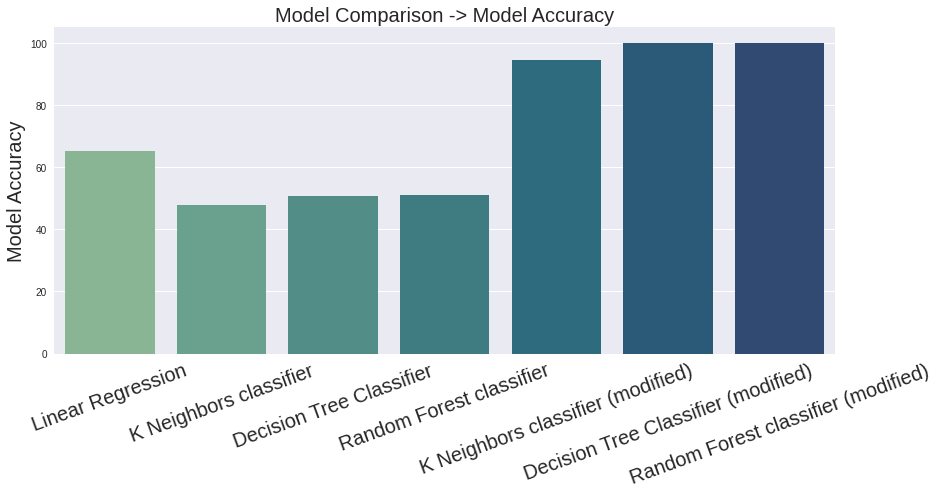

In [ ]:
x = ["Linear Regression", "K Neighbors classifier", "Decision Tree Classifier", "Random Forest classifier", "K Neighbors classifier (modified)", "Decision Tree Classifier (modified)", "Random Forest classifier (modified)"] 
y = [LinearRegressionScore*100, KNeighborsClassifierScore*100, DecisionTreeClassifierScore*100, RandomForestClassifierScore*100, KNeighborsClassifierScore2*100, DecisionTreeClassifierScore2*100, RandomForestClassifierScore2*100]
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x=x,y=y, palette="crest")
plt.ylabel("Model Accuracy", fontsize=20) 
plt.xticks (rotation=20, fontsize=20) 
plt.title("Model Comparison -> Model Accuracy", fontsize=20);

KFold Accuracies: [1.         0.99967794 1.         0.99978529 0.99967794 0.99978529
 1.         1.         0.99978527 0.99978527]
Mean KFold Accuracy: 0.9998497001668168
[1 1 3 ... 1 5 7]
Accuracy Score: 0.998368188259544


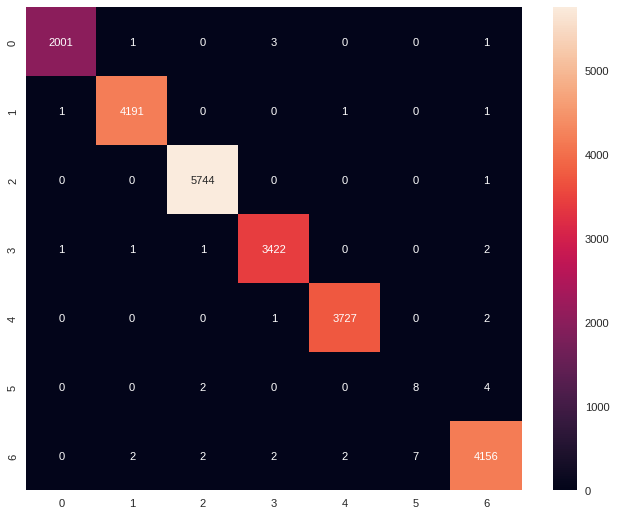

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict

xgb_clf = DecisionTreeClassifier()

# Training the XGBClassifier
xgb_clf.fit(X_train, y_train)

# KFold Accuracy Score
kfold_accuraies = cross_val_score(xgb_clf, new_x_train, new_y_train, cv=10, n_jobs=-1)
print("KFold Accuracies:", kfold_accuraies)
print("Mean KFold Accuracy:", kfold_accuraies.mean())

# Predicting Size for Testing Data
y_pred = cross_val_predict(xgb_clf, new_x_test, new_y_test, cv=10, n_jobs=-1)
print(y_pred)

# Accuracy Score
print("Accuracy Score:", accuracy_score(new_y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(confusion_matrix(new_y_test, y_pred), annot=True, fmt="d")
plt.show()

In [ ]:
pickle.dump(Lreg, open('LinerReg.pkl', 'wb'))
pickle.dump(Lreg, open('KNNclassifier.pkl', 'wb'))
pickle.dump(Lreg, open('STclassifier.pkl', 'wb'))
pickle.dump(Lreg, open('RFclassifier.pkl', 'wb'))